19120624 - Nguyễn Trọng Phước

Danh sách kiểm tra phân tích dữ liệu

● Trả lời những câu hỏi về bộ dữ liệu:
1. Bạn đã xác định số liệu trước khi bắt đầu?
2. Bạn đã hiểu ngữ cảnh cho câu hỏi và ứng dụng?
3. Bạn đã xem xét liệu câu hỏi có thể được trả lời với dữ liệu có sẵn
không?


● Xóa dữ liệu:
1. Dữ liệu có bị thiếu không?
2. Mỗi bảng có các kiểu dữ liệu khác nhau? Có kiểu dữ liệu nào chưa
phù hợp?
3. Kiểm tra các ngoại lệ


● Phân tích khám phá:
1. Trực quan hoá mối quan hệ đơn biến (histogram, distplot,
boxplot)
2. Trực quan hoá các tương quan đa biến (scatterplot, jointplot,
kde plot, correlation matrix)


● Trình bày:
1. Bạn đã dẫn dắt một cách ngắn gọn, dễ hiểu cho mọi người về vấn đề
của bạn?
2. Bạn đã giải thích dữ liệu, mô tả câu hỏi cần quan tâm?


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import datetime

Lấy dữ liệu

In [3]:
user_df = pd.read_csv('api_data/user.csv')
user_df = user_df.set_index('id')
playlist_df = pd.read_csv('api_data/playlist.csv')
playlist_df = playlist_df.set_index('id')
track_df = pd.read_csv('api_data/track.csv')
track_df = track_df.set_index('id')
user_df.head()


,avatar_url,city,comments_count,country_code,created_at,description,followers_count,followings_count,first_name,full_name,...,permalink_url,playlist_count,reposts_count,track_count,uri,urn,username,verified,station_urn,station_permalink
id,,,,,,,,,,,,,,,,,,,,,
81290815,https://i1.sndcdn.com/avatars-a20m3vXOqHSDGn9P...,Jupiter,8,NaN,2014-02-21T18:46:22Z,NaN,21,2,Vidar,Vidar Westerlund,...,https://soundcloud.com/morningwoodinu,1,NaN,1,https://api.soundcloud.com/users/81290815,soundcloud:users:81290815,Vidar Westerlund,False,soundcloud:system-playlists:artist-stations:81...,artist-stations:81290815
88985927,https://i1.sndcdn.com/avatars-000178228275-wkq...,San Francisco,3,US,2014-04-11T22:23:37Z,Product Hunt Radio (PHR) is for the product ge...,4709,0,Product,Product Hunt,...,https://soundcloud.com/producthunt,1,NaN,137,https://api.soundcloud.com/users/88985927,soundcloud:users:88985927,Product Hunt,False,soundcloud:system-playlists:artist-stations:88...,artist-stations:88985927
62921190,https://i1.sndcdn.com/avatars-000073120599-46q...,Menlo Park,12,US,2013-10-20T19:59:10Z,The a16z Podcast discusses tech and culture tr...,33464,0,Andreessen Horowitz,Andreessen Horowitz,...,https://soundcloud.com/a16z,0,NaN,501,https://api.soundcloud.com/users/62921190,soundcloud:users:62921190,a16z,False,soundcloud:system-playlists:artist-stations:62...,artist-stations:62921190
57719179,https://i1.sndcdn.com/avatars-000054306206-bpm...,NaN,0,NaN,2013-09-11T18:47:30Z,NaN,561,0,NaN,NaN,...,https://soundcloud.com/thebigwebshow,0,NaN,3,https://api.soundcloud.com/users/57719179,soundcloud:users:57719179,The Big Web Show,False,soundcloud:system-playlists:artist-stations:57...,artist-stations:57719179
18085321,https://i1.sndcdn.com/avatars-Oi1cv6yg1Y3ftdMR...,NaN,26,US,2012-06-05T00:01:17Z,Salute the Groove - Where we only repost the t...,11924,267,NaN,NaN,...,https://soundcloud.com/salutethegroove,11,NaN,0,https://api.soundcloud.com/users/18085321,soundcloud:users:18085321,SALUTE THE GROOVE,False,soundcloud:system-playlists:artist-stations:18...,artist-stations:18085321


In [4]:
#Lấy số lượng dòng và cột
user_rows = len(user_df)
user_columns = len(user_df.columns)
playlist_rows = len(playlist_df)
playlist_columns = len(playlist_df.columns)
track_rows = len(track_df)
track_columns = len(track_df.columns)
print(f'user: {user_rows} rows x {user_columns} columns\nplaylist: {playlist_rows} rows x {playlist_columns} columns\ntrack: {track_rows} rows x {track_columns} columns')

user: 1021 rows x 27 columns
playlist: 1056 rows x 31 columns
track: 1098 rows x 45 columns


In [5]:
#xem có bị trùng dữ liệu không
user_df = user_df[~user_df.index.duplicated(keep='first')]
playlist_df = playlist_df[~playlist_df.index.duplicated(keep='first')]
track_df = track_df[~track_df.index.duplicated(keep='first')]
print(f'number of duplicated:\nuser:{user_rows-len(user_df)}\nplaylist:{playlist_rows-len(playlist_df)}\ntrack:{track_rows-len(track_df)}\n')

number of duplicated:
user:6
playlist:0
track:0



In [6]:
#update lại user_rows
user_rows = len(user_df)

In [7]:
#Xem kiểu dữ liệu
print(user_df.dtypes)
print(playlist_df.dtypes)
print(track_df.dtypes)

avatar_url               object
city                     object
comments_count            int64
country_code             object
created_at               object
description              object
followers_count           int64
followings_count          int64
first_name               object
full_name                object
groups_count              int64
kind                     object
last_modified            object
last_name                object
likes_count               int64
playlist_likes_count      int64
permalink                object
permalink_url            object
playlist_count            int64
reposts_count           float64
track_count               int64
uri                      object
urn                      object
username                 object
verified                   bool
station_urn              object
station_permalink        object
dtype: object
artwork_url          object
created_at           object
description          object
duration              int64
embeddable

In [8]:
#sử lý các track, playlist có duration = 0 
track_df = track_df[track_df['duration']!=0]
print("tracks remove :", track_rows - len(track_df))
track_rows = len(track_df)
playlist_df = playlist_df[playlist_df['duration']!=0]
print("playlists remove :", playlist_rows - len(playlist_df))
playlist_rows = len(playlist_df)

tracks remove : 1
playlists remove : 6


Câu 1: Bảng xếp hạng thể loại nhạc tháng trong 1 năm nhất định

In [9]:
years = track_df['created_at'].str.slice(stop=4)
result ={}
set_years = set(years)
set_years=sorted(set_years)
temp_df = track_df[['created_at','genre']]
temp_df['created_at'] = track_df['created_at'].str.slice(stop=4)
temp_df=temp_df.dropna()
for year in set_years:
    temp2_df = temp_df[temp_df['created_at'] == year]
    list_genre = list(temp2_df['genre'])
    most_genre = max(set(list_genre), key = list_genre.count)
    result[year] = most_genre
result


C:\Users\death\AppData\Local\Temp/ipykernel_13952/3410379762.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['created_at'] = track_df['created_at'].str.slice(stop=4)


{'2007': 'Hip-hop/rap',
 '2008': 'house',
 '2009': 'house',
 '2010': 'deep house',
 '2011': 'Announcement',
 '2012': 'Jazz',
 '2013': 'Serviço',
 '2014': 'Framtidsbas',
 '2015': 'MadeWithFigure',
 '2016': 'Electronic',
 '2017': 'Technology',
 '2018': 'Technology',
 '2019': 'Technology',
 '2020': 'Alternative',
 '2021': 'Oldies'}

Câu 2: Tỉ lệ về khả năng download track (true/false)

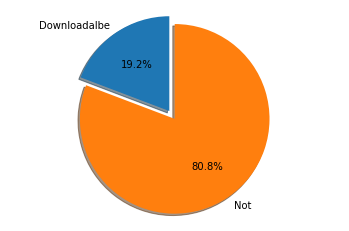

In [10]:
list_downloadable = list(track_df['downloadable'])
yes_percent=round((list_downloadable.count(True)/len(list_downloadable))*100,2)
no_percent = 100- yes_percent
labels = 'Downloadalbe', 'Not'
sizes = [yes_percent, no_percent]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


Câu 3:Những bài hát có độ tương tác cao (like/cmt)

C:\Users\death\AppData\Local\Temp/ipykernel_13952/2763043967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['total'] = sum_comlike


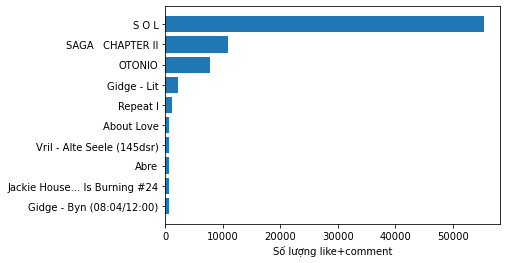

In [11]:
temp_df = track_df[['title','comment_count','likes_count']]
sum_comlike = temp_df['comment_count']+temp_df['likes_count']
temp_df['total'] = sum_comlike
list_total = list(set(sum_comlike))
list_total.sort(reverse=True)
list_total = list_total[0:9]
tracks = temp_df[temp_df['total'].isin(list_total)]
tracks=tracks.sort_values(by=['total'])
plt.barh(tracks['title'],tracks['total'])
plt.xlabel('Số lượng like+comment')
plt.style.use('ggplot')
plt.show()

câu 4 :  Những album có số lượng track cao nhất

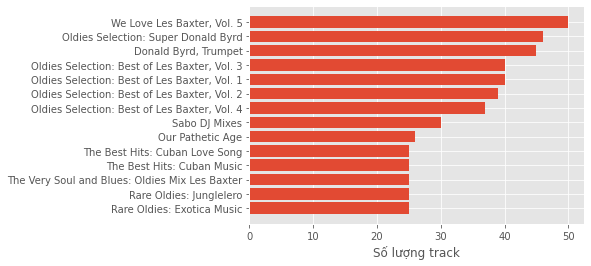

In [12]:
temp_df = playlist_df[['title','is_album','track_count']]
temp_df = temp_df[temp_df['is_album']==True]
list_track_count = list(set(temp_df['track_count']))
list_track_count.sort(reverse=True)
list_track_count=list_track_count[0:9]
temp_df = temp_df[temp_df['track_count'].isin(list_track_count)]
temp_df=temp_df.sort_values(by=['track_count'])
plt.barh(temp_df['title'],temp_df['track_count'])
plt.xlabel('Số lượng track')
plt.style.use('ggplot')
plt.show()

Câu 5: Hot user của các city

In [13]:
temp_df = user_df[['city','full_name','followers_count']]
temp_df.dropna()
temp_df['city']= temp_df['city'].str.split('/')
temp_df = temp_df.explode('city')
temp_df['city']= temp_df['city'].str.lower()
result={}
set_city = set(temp_df['city'])
set_city.pop()
for city in set_city:
    temp2_df = temp_df[temp_df['city'] == city]
    hot_user = max(set(temp2_df['followers_count']))
    result[city]=hot_user

C:\Users\death\AppData\Local\Temp/ipykernel_13952/4267240971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['city']= temp_df['city'].str.split('/')


Câu 6: User đóng góp lớn nhất

                              full_name  playlist_count  track_count  total
id                                                                         
946247          Bastard Jazz Recordings             114          550    664
15713796                     since 2012              63          743    806
2920187              Afropop  Worldwide              20          867    887
10743701              Bruce Springsteen              90          894    984
7390584                  Groove Magazin              55         1273   1328
251687            Ghostly International             142         1258   1400
21591953                 Kenneth  Bager              97         1339   1436
352                   The Delsin Robots             236         1362   1598
1961056   Global music radio from Paris              96         5933   6029


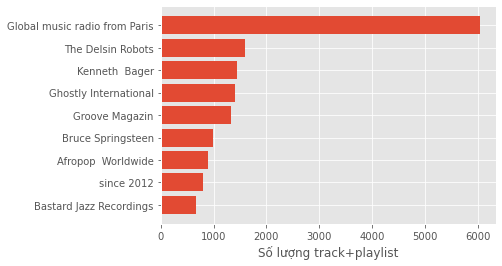

In [14]:
temp_df = user_df[['full_name','playlist_count','track_count']]
temp_df=temp_df.dropna()
temp_df['total'] = temp_df['playlist_count']+temp_df['track_count']
list_total = list(set(temp_df['total']))
list_total.sort(reverse=True)
list_total = list_total[0:9]
temp_df = temp_df[temp_df['total'].isin(list_total)]
temp_df=temp_df.sort_values(by=['total'])
plt.barh(temp_df['full_name'],temp_df['total'])
plt.xlabel('Số lượng track+playlist')
plt.style.use('ggplot')
plt.show()

Câu 7 : Nước có nhiều tương tác nhất

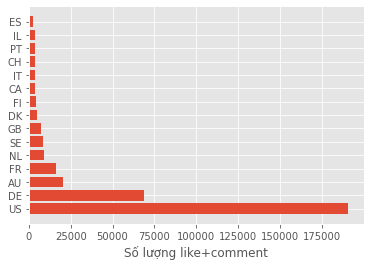

In [30]:
temp_df = user_df[['country_code','comments_count','likes_count']]
temp_df = temp_df.dropna()
set_country = set(temp_df['country_code'])
result={}
for country in set_country:
    temp2_df = temp_df[temp_df['country_code']==country]
    result[country] = sum(temp2_df['comments_count'])+sum(temp2_df['likes_count'])
result=dict(sorted(result.items(), key=lambda item: item[1], reverse=True)[:15])
plt.barh(list(result.keys()),result.values())
plt.xlabel('Số lượng like+comment')
plt.style.use('ggplot')
plt.show()